In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
! pip install datasist==1.5.3

In [139]:
Chocolate = pd.read_csv('/content/Chocolate_Sales.csv')
Chocolate.head(2)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,4-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,1-Aug-22,"$7,896",94


## data cleaning

In [140]:
Chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   14000 non-null  object
 1   Country        14000 non-null  object
 2   Product        14000 non-null  object
 3   Date           14000 non-null  object
 4   Amount         14000 non-null  object
 5   Boxes Shipped  14000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 656.4+ KB


In [141]:
Chocolate.duplicated().sum()

np.int64(0)

In [142]:
Chocolate.isnull().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [143]:
Chocolate.columns = Chocolate.columns.str.lower().str.replace(' ', '_')
Chocolate.head(2)

,sales_person,country,product,date,amount,boxes_shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,4-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,1-Aug-22,"$7,896",94


In [144]:
Chocolate['date']=pd.to_datetime(Chocolate['date'],errors='coerce')

<ipython-input-144-1489a607c67e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Chocolate['date']=pd.to_datetime(Chocolate['date'],errors='coerce')


In [145]:
Chocolate.isnull().sum()

,0
sales_person,0
country,0
product,0
date,0
amount,0
boxes_shipped,0


In [146]:
Chocolate['amount'] = Chocolate['amount'].astype(str)
Chocolate['amount'] = Chocolate['amount'].str.replace('$', '')
Chocolate['amount'] = Chocolate['amount'].str.replace(',', '')
Chocolate['amount'] = Chocolate['amount'].astype(int)

## feature engineering

In [147]:
Chocolate['year'] = Chocolate['date'].dt.year
Chocolate['quarter'] = Chocolate['date'].dt.quarter
Chocolate['month'] = Chocolate['date'].dt.month
Chocolate['month_name'] = Chocolate['date'].dt.month_name()
Chocolate['day_name'] = Chocolate['date'].dt.day_name()

In [148]:
def season(month):
  if month in [12,1,2]:
    return 'winter'
  elif month in [3,4,5]:
    return 'spring'
  elif month in [6,7,8]:
    return 'summer'
  else:
    return 'autumn'

In [149]:
Chocolate['season'] = Chocolate['month'].apply(season)
Chocolate.head()

,sales_person,country,product,date,amount,boxes_shipped,year,quarter,month,month_name,day_name,season
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180,2022,1,1,January,Tuesday,winter
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94,2022,3,8,August,Monday,summer
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91,2022,3,7,July,Thursday,summer
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342,2022,2,4,April,Wednesday,spring
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184,2022,1,2,February,Thursday,winter


In [150]:
Chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sales_person   14000 non-null  object        
 1   country        14000 non-null  object        
 2   product        14000 non-null  object        
 3   date           14000 non-null  datetime64[ns]
 4   amount         14000 non-null  int64         
 5   boxes_shipped  14000 non-null  int64         
 6   year           14000 non-null  int32         
 7   quarter        14000 non-null  int32         
 8   month          14000 non-null  int32         
 9   month_name     14000 non-null  object        
 10  day_name       14000 non-null  object        
 11  season         14000 non-null  object        
dtypes: datetime64[ns](1), int32(3), int64(2), object(6)
memory usage: 1.1+ MB


In [151]:
Chocolate.to_csv('Chocolate_Sales_update.csv', index=False)

## data analysis

In [152]:
Chocolate.describe()

,date,amount,boxes_shipped,year,quarter,month
count,14000,14000.000000,14000.000000,14000.0,14000.000000,14000.000000
mean,2022-05-03 10:43:46.971428608,6022.154000,214.445714,2022.0,1.889000,4.572786
min,2022-01-03 00:00:00,7.000000,1.000000,2022.0,1.000000,1.000000
25%,2022-03-04 00:00:00,2639.000000,95.000000,2022.0,1.000000,3.000000
50%,2022-05-05 00:00:00,5292.000000,191.000000,2022.0,2.000000,5.000000
75%,2022-07-01 00:00:00,8603.000000,312.000000,2022.0,3.000000,7.000000
max,2022-08-31 00:00:00,22050.000000,709.000000,2022.0,3.000000,8.000000
std,NaN,4256.393144,145.129731,0.0,0.779199,2.277797


In [153]:
Chocolate.describe(include='object')

,sales_person,country,product,month_name,day_name,season
count,14000,14000,14000,14000,14000,14000
unique,25,6,22,8,5,3
top,Kelci Walkden,New Zealand,Peanut Butter Cubes,March,Tuesday,summer
freq,606,2392,690,1913,2981,5442


In [154]:
#the total amount of chocolate sales
total_sales = Chocolate['amount'].sum()
total_sales

np.int64(84310156)

In [155]:
#the total amount of chocolate boxes
total_boxes = Chocolate['boxes_shipped'].sum()
total_boxes

np.int64(3002240)

In [156]:
#the average amount of chocolate sales per transaction
avg_sales_per_transaction = Chocolate['amount'].mean().round(2)
avg_sales_per_transaction

np.float64(6022.15)

In [157]:
#the average amount of chocolate boxes per transaction
avg_boxes_per_transaction = Chocolate['boxes_shipped'].mean().round(0)
avg_boxes_per_transaction

np.float64(214.0)

In [158]:
#different product categories are there in the dataset
num_product_categories = Chocolate['product'].nunique()
num_product_categories

22

In [159]:
#the total amount of chocolate sales for the year 2022
sales_2022 = Chocolate[Chocolate['year'] == 2022]['amount'].sum()
sales_2022

np.int64(84310156)

In [160]:
#products has the highest total sales amount
category_sales = Chocolate.groupby('product')['amount'].sum().sort_values(ascending=False).head(10)
category_sales

,amount
product,
Peanut Butter Cubes,4429292
85% Dark Bars,4190494
Eclairs,4139982
Drinking Coco,4019085
99% Dark & Pure,4018854
Fruit & Nut Bars,4003356
Orange Choco,3984582
Raspberry Choco,3980221
Spicy Special Slims,3940825


In [161]:
#products has the highest total boxes shipped
category_boxes = Chocolate.groupby('product')['boxes_shipped'].sum().sort_values(ascending=False).head(10)
category_boxes

,boxes_shipped
product,
99% Dark & Pure,148874
85% Dark Bars,148228
Peanut Butter Cubes,147565
Fruit & Nut Bars,146245
Orange Choco,144953
Caramel Stuffed Bars,143033
Eclairs,140723
Drinking Coco,138240
50% Dark Bites,136724


In [162]:
#countries has the highest total sales amount
country_sales = Chocolate.groupby('country')['amount'].sum().sort_values(ascending=False)
country_sales

,amount
country,
New Zealand,14297353
UK,14285236
Canada,14280861
Australia,14049098
India,13782419
USA,13615189


In [163]:
#countries has the highest total boxes shipped
country_boxes = Chocolate.groupby('country')['boxes_shipped'].sum().sort_values(ascending=False)
country_boxes

,boxes_shipped
country,
Canada,513061
New Zealand,507403
India,502232
UK,498746
Australia,497529
USA,483269


In [164]:
#salesperson has the highest total sales amount
salesperson_sales = Chocolate.groupby('sales_person')['amount'].sum().sort_values(ascending=False).head(10)
salesperson_sales

,amount
sales_person,
Kelci Walkden,3837190
Andria Kimpton,3563357
Marney O'Breen,3539942
Rafaelita Blaksland,3539137
Gigi Bohling,3524220
Beverie Moffet,3522498
Husein Augar,3513713
Oby Sorrel,3505096
Van Tuxwell,3473064


In [165]:
#salesperson has the highest total boxes shipped
salesperson_boxes = Chocolate.groupby('sales_person')['boxes_shipped'].sum().sort_values(ascending=False).head(10)
salesperson_boxes

,boxes_shipped
sales_person,
Karlen McCaffrey,131453
Camilla Castle,128164
Gigi Bohling,126856
Curtice Advani,126166
Kelci Walkden,125794
Beverie Moffet,125637
Ches Bonnell,125252
Oby Sorrel,125157
Husein Augar,123935


In [166]:
# the average amount of chocolate sales per day of the week
avg_sales_per_day_of_week = Chocolate.groupby('day_name')['amount'].mean().sort_values(ascending=False).round(2)
avg_sales_per_day_of_week

,amount
day_name,
Thursday,6149.24
Wednesday,6011.56
Tuesday,6004.18
Monday,5993.35
Friday,5964.54


In [167]:
# the average amount of chocolate boxes per day of the week
avg_boxes_per_day_of_week = Chocolate.groupby('day_name')['boxes_shipped'].mean().sort_values(ascending=False).round(0)
avg_boxes_per_day_of_week

,boxes_shipped
day_name,
Tuesday,217.0
Wednesday,216.0
Friday,215.0
Thursday,213.0
Monday,211.0


In [168]:
# the average amount of chocolate sales per season
avg_sales_per_season = Chocolate.groupby('season')['amount'].mean().sort_values(ascending=False).round(2)
avg_sales_per_season

,amount
season,
winter,6044.30
spring,6017.75
summer,6013.47


In [169]:
# the average amount of chocolate boxes per season
avg_boxes_per_season = Chocolate.groupby('season')['boxes_shipped'].mean().sort_values(ascending=False).round(0)
avg_boxes_per_season

,boxes_shipped
season,
winter,218.0
summer,215.0
spring,212.0


In [170]:
#month had the highest total sales amount in 2022
sales_by_month_2022 = Chocolate[Chocolate['year'] == 2022].groupby('month_name')['amount'].sum().sort_values(ascending=False)
sales_by_month_2022

,amount
month_name,
March,11760504
June,11235308
July,10800069
May,10738287
August,10689910
January,10318840
April,9744329
February,9022909


In [171]:
#month had the highest total boxes shipped in 2022
boxes_by_month_2022 = Chocolate[Chocolate['year'] == 2022].groupby('month_name')['boxes_shipped'].sum().sort_values(ascending=False)
boxes_by_month_2022

,boxes_shipped
month_name,
June,406266
March,396657
August,391438
May,382562
January,373814
July,370650
April,357904
February,322949


In [172]:
#the total amount of chocolate sales for each product category in each quarter
sales_by_category_quarter = Chocolate.groupby(['product', 'quarter'])['amount'].sum().head(6)
sales_by_category_quarter

product         quarter
50% Dark Bites  1          1453809
                2          1387449
                3           977788
70% Dark Bites  1          1360443
                2          1400294
                3           815752
Name: amount, dtype: int64

In [173]:
#the total amount of chocolate sales for each quarter
sales_by_quarter = Chocolate.groupby(['quarter'])['amount'].sum().sort_values(ascending=False)
sales_by_quarter

,amount
quarter,
2,31717924
1,31102253
3,21489979


In [174]:
#the average amount of chocolate sales for each quarter
average_sales_by_quarter = Chocolate.groupby(['quarter'])['amount'].mean().sort_values(ascending=False).round(2)
average_sales_by_quarter

,amount
quarter,
1,6082.98
3,6038.21
2,5953.06


In [175]:
#the total amount of chocolate boxes shipped for each quarter
boxes_by_quarter = Chocolate.groupby(['quarter'])['boxes_shipped'].sum().sort_values(ascending=False)
boxes_by_quarter

,boxes_shipped
quarter,
2,1146732
1,1093420
3,762088


## data reprocessing

In [176]:
Chocolate.head(2)

,sales_person,country,product,date,amount,boxes_shipped,year,quarter,month,month_name,day_name,season
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180,2022,1,1,January,Tuesday,winter
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94,2022,3,8,August,Monday,summer


In [177]:
Chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sales_person   14000 non-null  object        
 1   country        14000 non-null  object        
 2   product        14000 non-null  object        
 3   date           14000 non-null  datetime64[ns]
 4   amount         14000 non-null  int64         
 5   boxes_shipped  14000 non-null  int64         
 6   year           14000 non-null  int32         
 7   quarter        14000 non-null  int32         
 8   month          14000 non-null  int32         
 9   month_name     14000 non-null  object        
 10  day_name       14000 non-null  object        
 11  season         14000 non-null  object        
dtypes: datetime64[ns](1), int32(3), int64(2), object(6)
memory usage: 1.1+ MB


In [178]:
Chocolate_1 = pd.get_dummies(Chocolate,columns=['country']  ,drop_first=True, dtype=np.int16)
Chocolate_1.head()

,sales_person,product,date,amount,boxes_shipped,year,quarter,month,month_name,day_name,season,country_Canada,country_India,country_New Zealand,country_UK,country_USA
0,Jehu Rudeforth,Mint Chip Choco,2022-01-04,5320,180,2022,1,1,January,Tuesday,winter,0,0,0,1,0
1,Van Tuxwell,85% Dark Bars,2022-08-01,7896,94,2022,3,8,August,Monday,summer,0,1,0,0,0
2,Gigi Bohling,Peanut Butter Cubes,2022-07-07,4501,91,2022,3,7,July,Thursday,summer,0,1,0,0,0
3,Jan Morforth,Peanut Butter Cubes,2022-04-27,12726,342,2022,2,4,April,Wednesday,spring,0,0,0,0,0
4,Jehu Rudeforth,Peanut Butter Cubes,2022-02-24,13685,184,2022,1,2,February,Thursday,winter,0,0,0,1,0


In [179]:
Chocolate_1 = pd.get_dummies(Chocolate,drop_first=True, dtype=np.int16)
Chocolate_1.head()

,date,amount,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
0,2022-01-04,5320,180,2022,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2022-08-01,7896,94,2022,3,8,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2022-07-07,4501,91,2022,3,7,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,2022-04-27,12726,342,2022,2,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2022-02-24,13685,184,2022,1,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [180]:
from sklearn.preprocessing import OneHotEncoder
Chocolate_2 = Chocolate
onehot = OneHotEncoder(drop='first')
onehot.fit(Chocolate_2[["sales_person",	"country"	,"product",	"month_name",	"day_name",	"season"]])

OneHotEncoder(drop='first')

In [181]:
one_hot_chocolate = onehot.transform(Chocolate_2[["sales_person",	"country"	,"product",	"month_name",	"day_name",	"season"]])
one_hot_chocolate.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [182]:
chocolate_encoded = pd.DataFrame(one_hot_chocolate.toarray(), columns=onehot.get_feature_names_out())
chocolate_encoded

,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,sales_person_Curtice Advani,sales_person_Dennison Crosswaite,sales_person_Dotty Strutley,sales_person_Gigi Bohling,sales_person_Gunar Cockshoot,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
13997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [183]:
chocolate_final = pd.concat([Chocolate_2, chocolate_encoded], axis=1)
chocolate_final.drop(['sales_person',	'country'	,'product',	'month_name',	'day_name',	'season','date'], axis=1, inplace=True)
chocolate_final.head()

,amount,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
0,5320,180,2022,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,7896,94,2022,3,8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,4501,91,2022,3,7,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,12726,342,2022,2,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,13685,184,2022,1,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## handle outliers

In [184]:
chocolate_final.describe()

,amount,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
count,14000.000000,14000.000000,14000.0,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,...,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,6022.154000,214.445714,2022.0,1.889000,4.572786,0.039571,0.041357,0.037571,0.040571,0.041000,...,0.125857,0.134500,0.136643,0.128929,0.206214,0.183286,0.212929,0.199500,0.388714,0.228571
std,4256.393144,145.129731,0.0,0.779199,2.277797,0.194957,0.199122,0.190164,0.197302,0.198297,...,0.331700,0.341201,0.343482,0.335133,0.404601,0.386914,0.409392,0.399639,0.487476,0.419928
min,7.000000,1.000000,2022.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2639.000000,95.000000,2022.0,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5292.000000,191.000000,2022.0,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8603.000000,312.000000,2022.0,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,22050.000000,709.000000,2022.0,3.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='amount'>

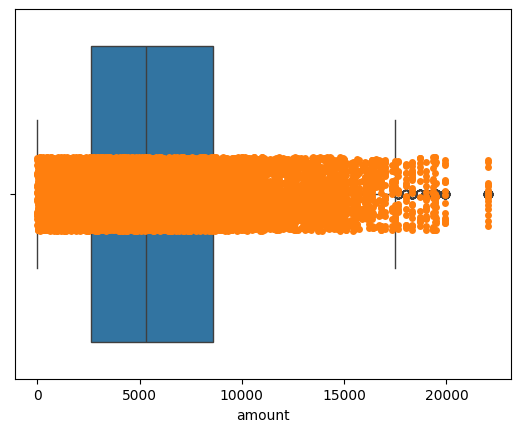

In [185]:
sns.boxplot(data = chocolate_final , x = 'amount')
sns.stripplot(data = chocolate_final , x = 'amount')

<Axes: xlabel='boxes_shipped'>

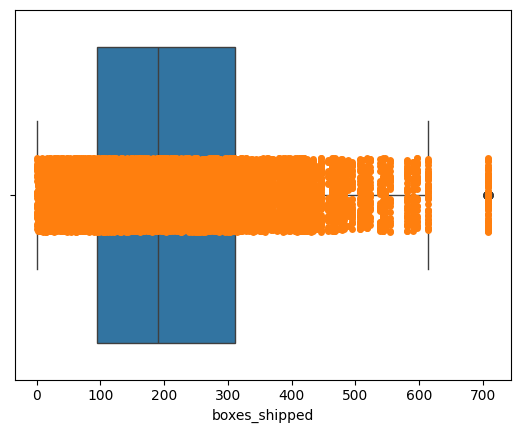

In [186]:
sns.boxplot(data = chocolate_final , x = 'boxes_shipped')
sns.stripplot(data = chocolate_final , x = 'boxes_shipped')

In [187]:
from datasist.structdata import detect_outliers

outlier_indices = detect_outliers(chocolate_final , 0 , ['amount'])
outlier_indices

[66,
 135,
 212,
 434,
 543,
 589,
 609,
 751,
 806,
 1008,
 1108,
 1176,
 1190,
 1199,
 1295,
 1347,
 1396,
 1564,
 1839,
 1945,
 2099,
 2179,
 2307,
 2332,
 2365,
 2373,
 2512,
 2606,
 2914,
 2959,
 2984,
 3010,
 3013,
 3060,
 3082,
 3095,
 3129,
 3217,
 3264,
 3324,
 3416,
 3477,
 3536,
 3547,
 3633,
 3852,
 3983,
 3985,
 4166,
 4173,
 4223,
 4280,
 4284,
 4300,
 4307,
 4319,
 4384,
 4398,
 4574,
 4624,
 4751,
 4974,
 5022,
 5189,
 5215,
 5306,
 5655,
 5748,
 5749,
 5873,
 5912,
 5960,
 5992,
 6068,
 6123,
 6166,
 6192,
 6287,
 6325,
 6391,
 6545,
 6573,
 6576,
 6676,
 6699,
 6740,
 6888,
 6900,
 6940,
 6950,
 7013,
 7078,
 7129,
 7146,
 7175,
 7278,
 7285,
 7397,
 7448,
 7547,
 7592,
 7618,
 7637,
 7783,
 7909,
 7935,
 7950,
 8032,
 8051,
 8090,
 8189,
 8312,
 8368,
 8547,
 8600,
 8689,
 9118,
 9650,
 9824,
 9922,
 9945,
 9970,
 9999,
 10024,
 10031,
 10273,
 10317,
 10328,
 10421,
 10488,
 10657,
 10660,
 10739,
 10912,
 10913,
 10990,
 11002,
 11022,
 11030,
 11132,
 11143,
 1129

In [188]:
from datasist.structdata import detect_outliers
detect_outliers = detect_outliers(chocolate_final, 0 , ['amount'])
median = chocolate_final['amount'].median()
chocolate_final['amount'].loc[detect_outliers] = median

<ipython-input-188-2a1fc3c23d61>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  chocolate_final['amount'].loc[detect_outliers] = median
<ipython-input-188-2a1fc3c23d61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

<Axes: xlabel='amount'>

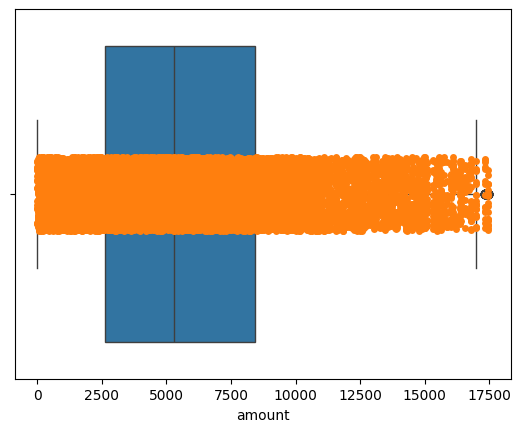

In [189]:
sns.boxplot(data = chocolate_final , x = 'amount')
sns.stripplot(data = chocolate_final , x = 'amount')

In [190]:
from datasist.structdata import detect_outliers

outlier_indices = detect_outliers(chocolate_final , 0 , ['boxes_shipped'])
outlier_indices

[730,
 1028,
 1453,
 1621,
 1673,
 1786,
 1823,
 1872,
 2010,
 2326,
 2639,
 2926,
 3481,
 3981,
 4131,
 4315,
 4424,
 4429,
 4436,
 5326,
 5348,
 5424,
 5441,
 5495,
 5810,
 5984,
 6128,
 6155,
 6187,
 6222,
 6367,
 6630,
 6697,
 7355,
 7517,
 7888,
 7971,
 8461,
 8493,
 8519,
 8733,
 8802,
 8844,
 9689,
 9996,
 10206,
 10867,
 11007,
 11071,
 11138,
 11254,
 11851,
 12028,
 12285,
 12673,
 12767,
 12810,
 12942,
 13018,
 13036,
 13097,
 13145,
 13157,
 13168,
 13176,
 13186,
 13205,
 13613,
 13619]

In [191]:
from datasist.structdata import detect_outliers
detect_outliers = detect_outliers(chocolate_final, 0 , ['boxes_shipped'])
median = chocolate_final['boxes_shipped'].median()
chocolate_final['boxes_shipped'].loc[detect_outliers] = median

<ipython-input-191-74529e6b4899>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  chocolate_final['boxes_shipped'].loc[detect_outliers] = median
<ipython-input-191-74529e6b4899>:4: SettingWithCopyWarning: 
A value is trying to be set on a co

<Axes: xlabel='boxes_shipped'>

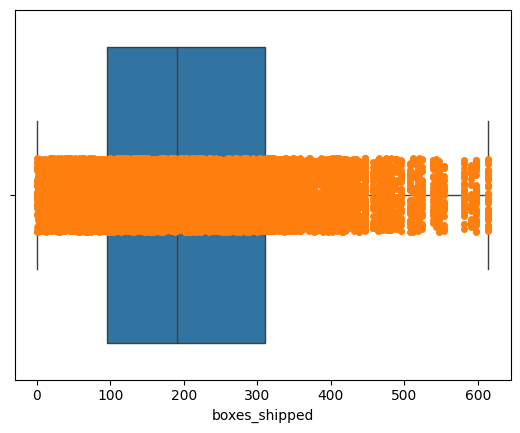

In [192]:
sns.boxplot(data = chocolate_final , x = 'boxes_shipped')
sns.stripplot(data = chocolate_final , x = 'boxes_shipped')

## output and input

In [193]:
input= chocolate_final.drop('amount',axis=1)
output= chocolate_final['amount']

In [194]:
input

,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,sales_person_Curtice Advani,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
0,180,2022,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,94,2022,3,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,91,2022,3,7,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,342,2022,2,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,184,2022,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,59,2022,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13996,113,2022,3,8,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
13997,137,2022,1,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13998,329,2022,2,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [195]:
output

,amount
0,5320
1,7896
2,4501
3,12726
4,13685
...,...
13995,952
13996,4879
13997,5782
13998,8897


In [196]:
from sklearn.model_selection import train_test_split
input_train,input_test,output_train,output_test=train_test_split(input,output,test_size=0.2,shuffle=True,random_state=0)


In [197]:
input_train

,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,sales_person_Curtice Advani,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
5341,178,2022,3,8,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8028,30,2022,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9440,18,2022,2,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10399,196,2022,1,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6518,85,2022,2,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,228,2022,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3264,236,2022,3,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9845,289,2022,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
10799,4,2022,3,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [198]:
input_test

,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,sales_person_Curtice Advani,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
6038,5,2022,2,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10758,432,2022,2,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
13882,226,2022,1,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2760,285,2022,3,7,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10778,208,2022,3,7,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,468,2022,2,5,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8339,418,2022,2,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7051,432,2022,2,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
377,223,2022,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [199]:
output_train

,amount
5341,8512
8028,9100
9440,3108
10399,6489
6518,6510
...,...
13123,2401
3264,5292
9845,14938
10799,7091


In [200]:
output_test

,amount
6038,1554
10758,10024
13882,12362
2760,9737
10778,7091
...,...
9982,3724
8339,10822
7051,6111
377,6034


## scaling

In [201]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
input_train_r_scaled = robust_scaler.fit_transform(input_train)

In [202]:
input_train_r_scaled = pd.DataFrame(input_train_r_scaled, columns=input_train.columns)
input_train_r_scaled

,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,sales_person_Curtice Advani,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
0,-0.055814,0.0,0.5,0.75,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.744186,0.0,-0.5,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.800000,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.027907,0.0,-0.5,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.488372,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11195,0.176744,0.0,-0.5,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11196,0.213953,0.0,0.5,0.75,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11197,0.460465,0.0,-0.5,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11198,-0.865116,0.0,0.5,0.75,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [203]:
input_test_r_scaled = robust_scaler.transform(input_test)

In [204]:
input_test_r_scaled = pd.DataFrame(input_test_r_scaled, columns=input_test.columns)
input_test_r_scaled

,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,sales_person_Curtice Advani,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
0,-0.860465,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.125581,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.167442,0.0,-0.5,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.441860,0.0,0.5,0.50,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.083721,0.0,0.5,0.50,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,1.293023,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2796,1.060465,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2797,1.125581,0.0,0.0,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2798,0.153488,0.0,-0.5,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
